In [1]:
from pyrootmemo.development.waldron import Waldron
from pyrootmemo.materials import MultipleRoots, Interface, Soil
from pyrootmemo.geometry import SoilProfile, FailureSurface
from pyrootmemo.tools.helpers import units
import numpy as np

In [2]:
# generate some root data
from collections import namedtuple
Parameter = namedtuple("parameter", "value unit")
roots = MultipleRoots(
    species = "test_species",
    diameter = Parameter([1, 2, 1, 3, 4, 5, 6, 3], 'mm'),
    tensile_strength = Parameter([40, 30, 40, 20, 10, 5, 20, 10], 'MPa'),
    elastic_modulus = Parameter([100, 100, 100, 100, 100, 100, 100, 100], 'MPa'),
    length = Parameter([1, 1, 1, 1, 1, 1, 1, 1], 'm'),
    #azimuth_angle = Parameter([0, 0, 0, 0, 0, 0, 0, 0], 'degrees'),
    #elevation_angle = Parameter([-40, -30, -20, -10, 0, 10, 20, 30], 'degrees')
)
# soil--root interface
interface = Interface(
    shear_strength = Parameter(50, "kPa")
)
# generate some soil data
soil = Soil(
    "Sand",
    cohesion = Parameter(2, "kPa"),
    friction_angle = Parameter(30, "degrees")
)
# soil profile object
soil_profile = SoilProfile([soil], depth = Parameter([100], 'm'))
# failure surface object
failure_surface = FailureSurface(
    cross_sectional_area = Parameter(1.0, "m^2"),
    shear_zone_thickness = Parameter(10, "mm"),
    depth = Parameter(1.0, "m")
)

In [3]:
# Create Waldron object
waldron = Waldron(roots, interface, soil_profile, failure_surface)

In [4]:
waldron.reinforcement(0.1 * units('mm'))

(<Quantity(2.26476844, 'newton / meter ** 2')>, None, array([0., 1., 0.]))

(<Quantity(69.2747672, 'millimeter')>, <Quantity(721.135496, 'newton / meter ** 2')>)


(<Figure size 432x288 with 1 Axes>,
 <Axes: xlabel='Shear displacement [mm]', ylabel='Reinforcement [kPa]'>)

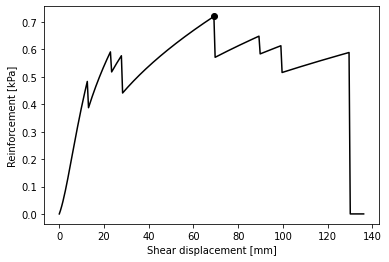

In [5]:
import matplotlib.pyplot as plt
cr = waldron.peak_reinforcement()
print(cr)
waldron.plot()

In [6]:
import numpy as np
a = np.random.rand(5, 3)
b = np.random.rand(3, 3)
print(np.tensordot(a, b, [-1, -1]))

[[0.72317802 0.83804625 0.53649027]
 [0.10429169 0.19116451 0.1984686 ]
 [0.79769061 1.03309829 0.83279773]
 [0.40369927 0.66792182 0.68232175]
 [0.86714193 1.11775616 0.89936559]]
